In [1]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Mengimpor library yang diperlukan
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Masukan train data yang sudah di-preprocessing di variable df_train
df_train = pd.read_csv('/kaggle/input/modul3-prak-ai/train.csv')

# Masukan test data yang sudah di-preprocessing di variable df_test
df_test = pd.read_csv('/kaggle/input/modul3-prak-ai/test.csv')

In [4]:
df_train.head()

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Nama,Tiba_Ditujuan
0,0001_01,Jakarta,False,B/0/P,Bali,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Lampung,False,F/0/S,Bali,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Jakarta,False,A/0/S,Bali,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Jakarta,False,A/0/S,Bali,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Lampung,False,F/1/S,Bali,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6954 entries, 0 to 6953
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Penumpang_id           6954 non-null   object 
 1   Asal                   6793 non-null   object 
 2   Sleeper_Plus           6783 non-null   object 
 3   Kabin                  6792 non-null   object 
 4   Tujuan                 6804 non-null   object 
 5   Umur                   6800 non-null   float64
 6   VIP                    6796 non-null   object 
 7   Servis_Kamar_Tambahan  6804 non-null   float64
 8   Belanja_Makanan        6801 non-null   float64
 9   Belanja_Merchandise    6786 non-null   float64
 10  Spa                    6808 non-null   float64
 11  Bioskop                6792 non-null   float64
 12  Nama                   6789 non-null   object 
 13  Tiba_Ditujuan          6954 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 713.2+ K

### Nomor 1
Cermati distribusi usia penumpang (Umur). Apa informasi yang dapat anda temukan? Gunakan visualisasi data!

In [6]:
df_train.describe()

,Umur,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop
count,6800.000000,6804.000000,6801.000000,6786.000000,6808.000000,6792.000000
mean,28.883676,225.257055,458.740038,174.220749,312.969741,302.348793
std,14.570737,662.105367,1634.970406,550.497694,1152.953321,1139.927062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,48.000000,76.000000,27.000000,58.000000,44.000000
max,79.000000,14327.000000,29813.000000,12253.000000,22408.000000,24133.000000


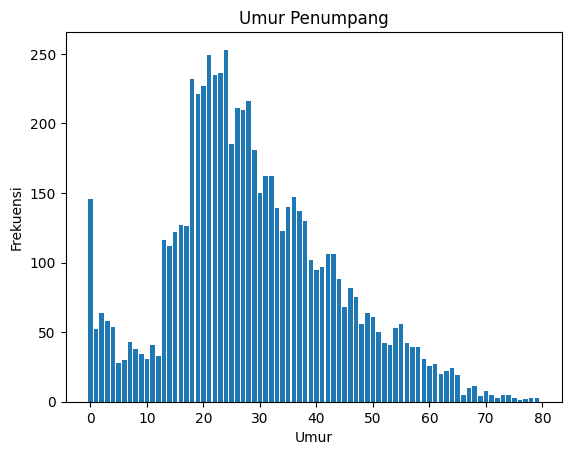

In [7]:
umur_counts = df_train['Umur'].value_counts()

plt.bar(umur_counts.index, umur_counts.values)
plt.title('Umur Penumpang')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

Dilihat dari data yang kita temukan, didapatkan mean umur penumpang = 28.883676, dan kebanyakan penumpang berumur pada kisaran 20-30 tahun

### Nomor 2
Selidiki hubungan antara usia penumpang, dan pilihan penumpang terhadap opsi Sleeper Plus (Sleeper_Plus) dan opsi VIP (VIP). Apakah ada kelompok usia tertentu yang lebih cenderung memilih salah satu opsi daripada yang lain? Gunakan visualisasi data!

In [8]:
sp_true = df_train[df_train['Sleeper_Plus'] == True]
vip_true = df_train[df_train['VIP'] == True]

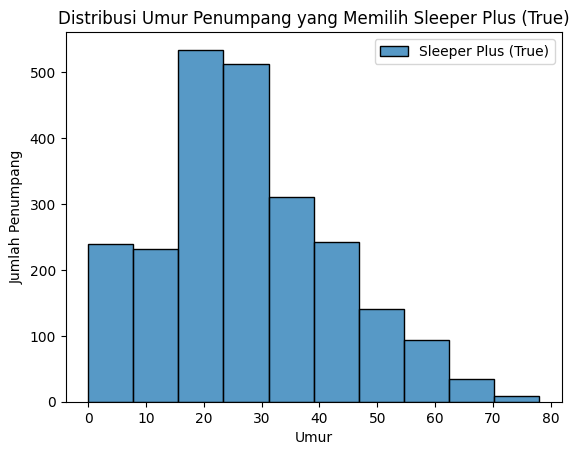

In [9]:
# Membuat chart
sns.histplot(sp_true['Umur'], bins=10, label='Sleeper Plus (True)')
plt.xlabel('Umur')
plt.ylabel('Jumlah Penumpang')
plt.title('Distribusi Umur Penumpang yang Memilih Sleeper Plus (True)')
plt.legend()
plt.show()

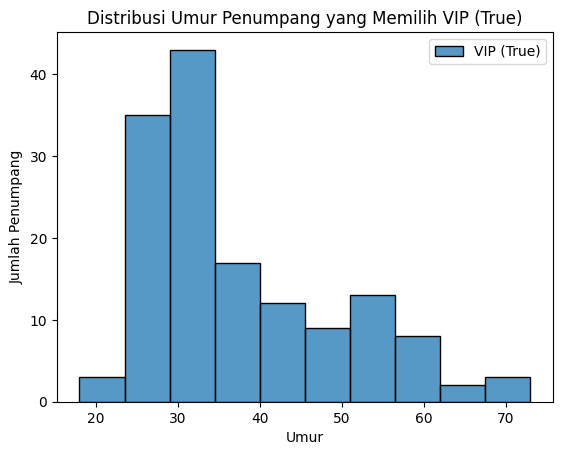

In [10]:
# Membuat chart
sns.histplot(vip_true['Umur'], bins=10, label='VIP (True)')
plt.xlabel('Umur')
plt.ylabel('Jumlah Penumpang')
plt.title('Distribusi Umur Penumpang yang Memilih VIP (True)')
plt.legend()
plt.show()

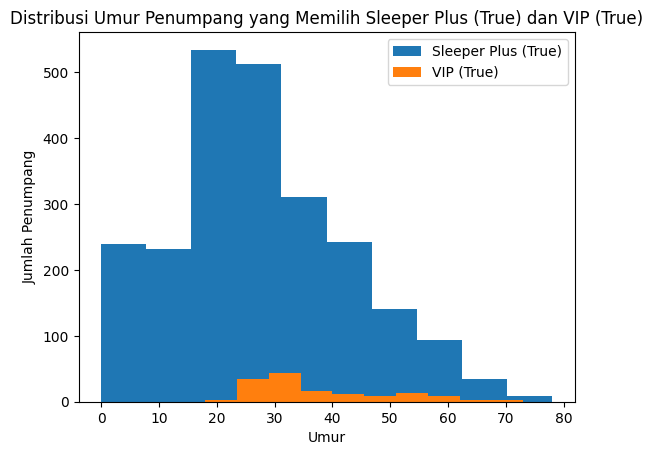

In [11]:
# Membuat chart
plt.hist(sp_true['Umur'], bins=10, label='Sleeper Plus (True)')
plt.hist(vip_true['Umur'], bins=10, label='VIP (True)')
plt.xlabel('Umur')
plt.ylabel('Jumlah Penumpang')
plt.title('Distribusi Umur Penumpang yang Memilih Sleeper Plus (True) dan VIP (True)')
plt.legend()
plt.show()

Berdasarkan data yang didapat, terlihat bahwa penumpang lebih dominan memilih layanan sleeper plus dibandingkan layanan VIP. Selain itu kita juga bisa melihat kebanyakan penumpang menggunakan layanan Sleeper Plus berada pada usia (+- 17-32thn) dan untuk yang memakai layanan VIP berada pada usia (+- 25-35thn)

### Nomor 3
Selidiki hubungan/korelasi antara pengeluaran untuk berbagai fasilitas tambahan (Layanan_Kamar_Tambahan, Belanja_Makanan, Belanja_Merchandise, Spa, Bioskop). Apakah penumpang yang menghabiskan lebih banyak uang untuk suatu fasilitas, akan juga cenderung menghabiskan lebih banyak uang untuk fasilitas lainnya? Gunakan visualisasi data!

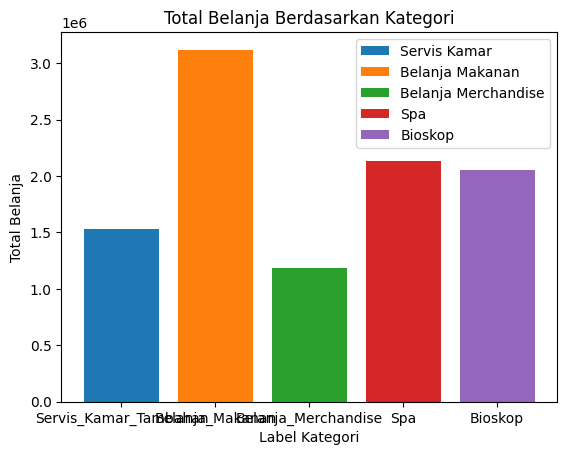

In [12]:
# Hitung Total
total_servis_kamar = df_train['Servis_Kamar_Tambahan'].sum()
total_belanja_makanan = df_train['Belanja_Makanan'].sum()
total_belanja_merchandise = df_train['Belanja_Merchandise'].sum()
total_spa = df_train['Spa'].sum()
total_bioskop = df_train['Bioskop'].sum()

# Membuat bar chart
plt.bar('Servis_Kamar_Tambahan', total_servis_kamar, label='Servis Kamar')
plt.bar('Belanja_Makanan', total_belanja_makanan, label='Belanja Makanan')
plt.bar('Belanja_Merchandise', total_belanja_merchandise, label='Belanja Merchandise')
plt.bar('Spa', total_spa, label='Spa')
plt.bar('Bioskop', total_bioskop, label='Bioskop')

plt.xlabel('Label Kategori')
plt.ylabel('Total Belanja')
plt.title('Total Belanja Berdasarkan Kategori')
plt.legend()
plt.show()

Dapat kita lihat, penumpang lebih banyak menghabiskan uangnya untuk membeli makanan, selanjutnya disusul oleh spa dan bioskop. Terlihat disini hanya sedikit penumpang yang menghabiskan uangnya untuk membeli merch

### Nomor 4
Bandingkan pengeluaran fasilitas tambahan (Layanan_Kamar_Tambahan, Belanja_Makanan, Belanja_Merchandise, Spa, Bioskop) antara penumpang VIP dan non-VIP! Apakah menjadi penumpang VIP mempengaruhi pengeluaran?

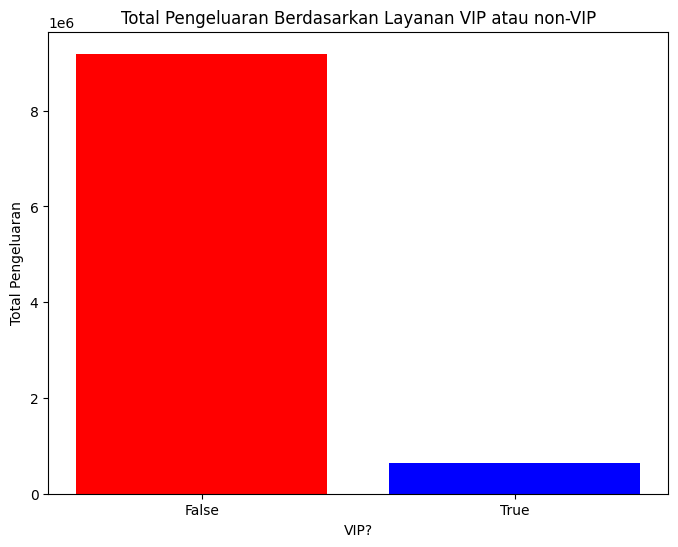

In [13]:
# Menjumlahkan kolom-kolom yang diperlukan
df_train['Total'] = df_train[['Servis_Kamar_Tambahan', 'Belanja_Makanan', 'Belanja_Merchandise', 'Spa', 'Bioskop']].sum(axis=1)

# Mengelompokkan data berdasarkan label VIP (True/False) dan menghitung total sum
grouped_data = df_train.groupby('VIP')['Total'].sum()

# Membuat bar chart
plt.figure(figsize=(8, 6))
plt.bar(grouped_data.index.astype(str), grouped_data.values, color=['red', 'blue'])
plt.xlabel('VIP?')
plt.ylabel('Total Pengeluaran')
plt.title('Total Pengeluaran Berdasarkan Layanan VIP atau non-VIP')
plt.show()

Dapat kita lihat, penumpang non VIP memiliki jumlah pengeluaran yang jauh lebih besar dibandingkan penumpang VIP, sehingga dapat disimpulkan penumpang VIP tidak mempengaruhi pengeluaran. Namun, perlu diperhatikan juga karena sangat jauh sekali perbandingan antara penumpang yang menggunakan layanan VIP dengan penumpang non VIP.

### Nomor 5
Cari tahu kota mana yang paling banyak menjadi tujuan, dan kota mana yang paling banyak menjadi asal penumpang! Gunakan visualisasi data!

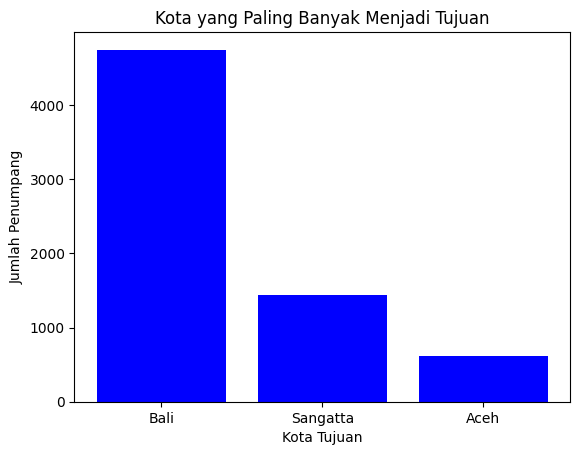

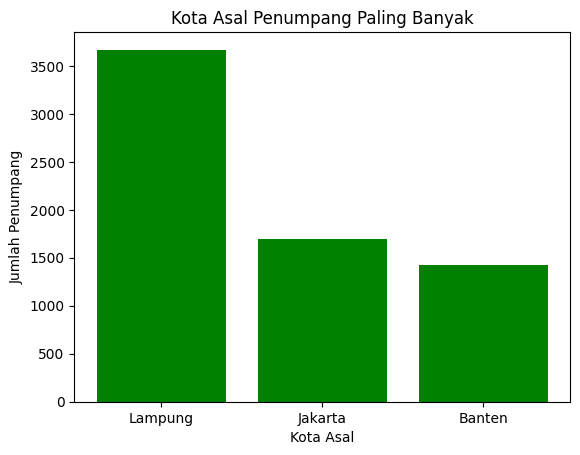

In [14]:
# Menghitung jumlah penumpang ke setiap tujuan
tujuan_counts = df_train['Tujuan'].value_counts()

# Menghitung jumlah penumpang dari setiap asal
asal_counts = df_train['Asal'].value_counts()

# Membuat bar chart untuk tujuan
plt.bar(tujuan_counts.index, tujuan_counts.values, color='b')
plt.xlabel('Kota Tujuan')
plt.ylabel('Jumlah Penumpang')
plt.title('Kota yang Paling Banyak Menjadi Tujuan')
plt.show()

# Membuat bar chart untuk asal
plt.bar(asal_counts.index, asal_counts.values, color='g')
plt.xlabel('Kota Asal')
plt.ylabel('Jumlah Penumpang')
plt.title('Kota Asal Penumpang Paling Banyak')
plt.show()

Kota yang paling banyak menjadi tujuan adalah kota Bali, dan penumpang paling banyak berasal dari kota Lampung.

### Nomor 6
Bagaimana distribusi pilihan opsi Sleeper Plus (Sleeper_Plus) berdasarkan tujuan? Apakah tujuan mempengaruhi pilihan penumpang terhadap opsi Sleeper Plus? Gunakan visualisasi data!

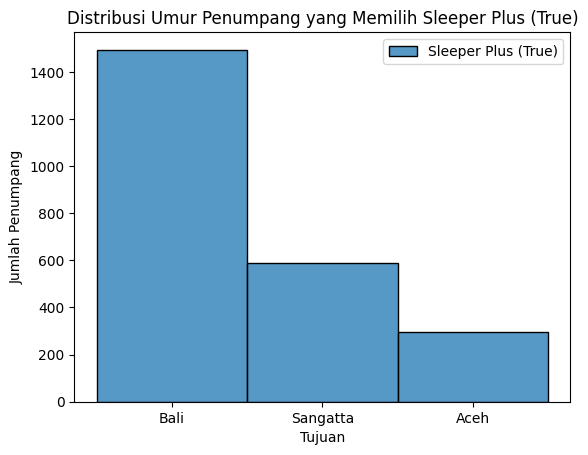

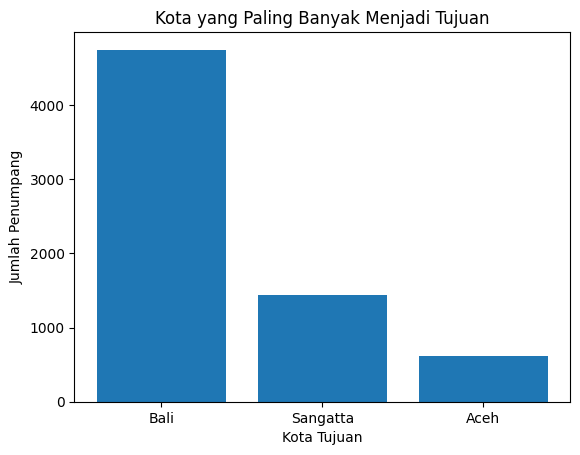

In [15]:
# Membuat chart
sns.histplot(sp_true['Tujuan'], label='Sleeper Plus (True)')
plt.xlabel('Tujuan')
plt.ylabel('Jumlah Penumpang')
plt.title('Distribusi Umur Penumpang yang Memilih Sleeper Plus (True)')
plt.legend()
plt.show()

plt.bar(tujuan_counts.index, tujuan_counts.values)
plt.xlabel('Kota Tujuan')
plt.ylabel('Jumlah Penumpang')
plt.title('Kota yang Paling Banyak Menjadi Tujuan')
plt.show()

Penggunaan layanan Sleeper Plus berbanding lurus dengan jumlah penumpang yang akan pergi pada tujuan tersebut. Sehingga memiliki kemungkinan bahwa kota tujuan berpengaruh dengan penggunaan layanan sleeper plus.

### Nomor 7
Tentukan distribusi penumpang di seluruh kabin kapal berdasarkan deck. Apakah area tertentu di kapal lebih padat penumpang dibandingkan area lainnya? Gunakan visualisasi data!

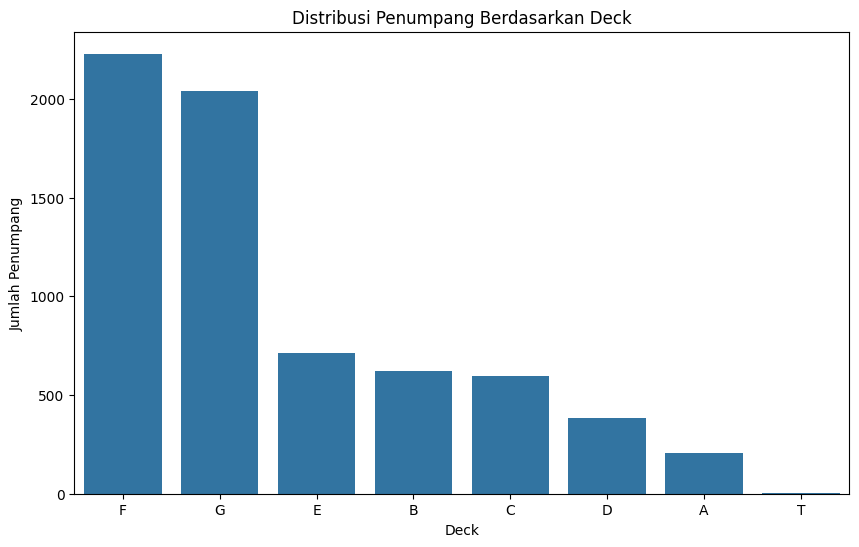

In [16]:
# Ekstrak deck dari kolom Kabin
df_train['Deck'] = df_train['Kabin'].str.extract(r'([A-Z])')

# Menghitung jumlah penumpang di setiap deck
deck_counts = df_train['Deck'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=deck_counts.index, y=deck_counts.values)
plt.xlabel('Deck')
plt.ylabel('Jumlah Penumpang')
plt.title('Distribusi Penumpang Berdasarkan Deck')
plt.show()

Ya, area deck F di kapal lebih padat penumpang dibandingkan area deck lainnya

### Nomor 8
Selidiki bagaimana penumpang dikelompokkan. Apakah penumpang lebih sering bepergian sendiri, dalam kelompok kecil, atau dalam kelompok besar? Gunakan visualisasi data!


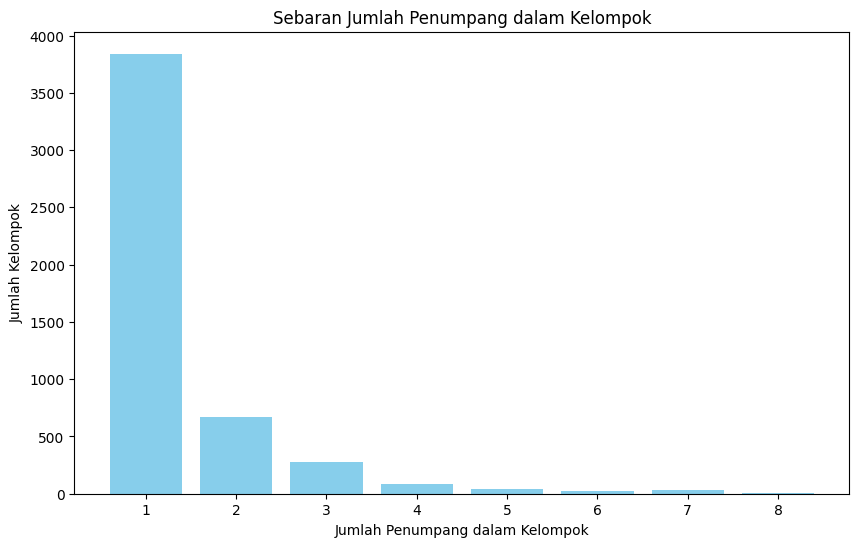

In [17]:
# Memisahkan kelompok dan nomor penumpang dalam kelompok
df_train[['Kelompok', 'Nomor_dalam_kelompok']] = df_train['Penumpang_id'].str.split('_', expand=True)

# Visualisasi sebaran jumlah penumpang dalam kelompok
group_sizes = df_train['Kelompok'].value_counts().value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(group_sizes.index, group_sizes.values, color='skyblue')
plt.xlabel('Jumlah Penumpang dalam Kelompok')
plt.ylabel('Jumlah Kelompok')
plt.title('Sebaran Jumlah Penumpang dalam Kelompok')
plt.show()

Dapat kita lihat penumpang lebih banyak bepergian sendirian dibandingkan berkelompok. Selanjutnya terdapat lebih dari 500 penumpang bepergian berkelompok kecil (2 orang), dan sangat sedikit sekali penumpang yang bepergian dengan kelompok besar.

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# df_submission.to_csv('submission.csv', index=False)